In [988]:
##%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt
import random


plt.rcParams["axes.grid"] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = [7, 5]

In [989]:
data = np.loadtxt("position_test.csv", dtype=float, delimiter=",")

N = 128
density = 0.55
kT = 1.5
L = (128/0.55)**(1/3)
n_steps = int(len(data))

len(data), len(data[0])

(1874, 773)

In [990]:


def maxVal(arr, max = True):
    if(max):
        max_index = np.argmax(arr)

        # Convert the 1D index to 2D indices
        rows, cols = np.unravel_index(max_index, arr.shape)

        print("Maximum value:", arr[rows, cols])
        print("Row index of maximum value:", rows)
        print("Column index of maximum value:", cols)
    else:
        min_index = np.argmin(arr)

        # Convert the 1D index to 2D indices
        rows, cols = np.unravel_index(min_index, arr.shape)

        print("Minimum value:", arr[rows, cols])
        print("Row index of minimum value:", rows)
        print("Column index of minimum value:", cols)


    

In [991]:
def timeAverage(arr):
    n = len(arr)

    numerator = np.cumsum(arr)
    denominator = np.arange(1, n+1)

    return numerator/denominator


In [992]:
Eerror = np.array([6.353, 5.662, 5.787, 5.703, 6.709]) #To 20 tau

E = np.array([-239.494, -237.948, -237.467, -236.656, -233.819])

steps = np.array([19999, 9999, 4999, 2499, 1249])

In [993]:
time = data[:,-1]
Epot = data[:,-2]
Ekin = data[:,-3]
Etot = Epot + Ekin
virial = data[:,-4]
avg_expo = data[:,-5]

pos = data[:,:3*N]
mom = data[:,3*N:6*N]

x = data[0, 0:3*N:3]
y = data[0, 1:3*N+1:3]
z = data[0, 2:3*N+2:3]

In [994]:
np.amax(pos), np.amax(mom)

(3.07552, 5.47992)

In [995]:
np.mean(Ekin)/(1.5*N)

1.6693222301894346

In [996]:
pos_min = np.zeros_like(pos[:,0])
pos_max = np.zeros_like(pos[:,0])

for i in range(len(pos[:,0])):
    pos_min[i] = np.amin(pos[i,:])
    pos_max[i] = np.amax(pos[i,:])


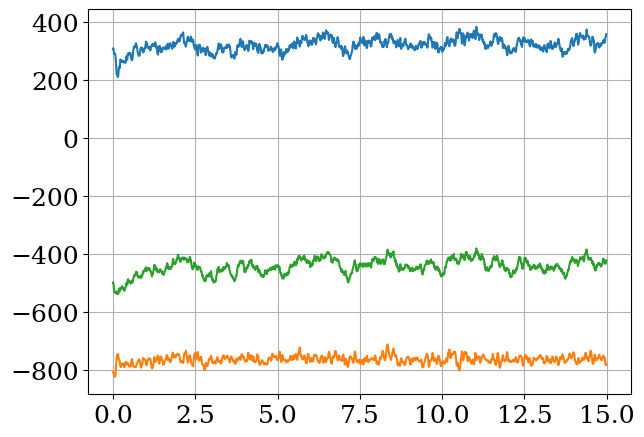

In [997]:
cut = 1000000

plt.plot(time[:cut], Ekin[:cut])
#plt.plot([0,time[-1]], [1.7*3/2,1.7*3/2])
plt.plot(time[:cut], Epot[:cut])
plt.plot(time[:cut], Epot[:cut]+Ekin[:cut])

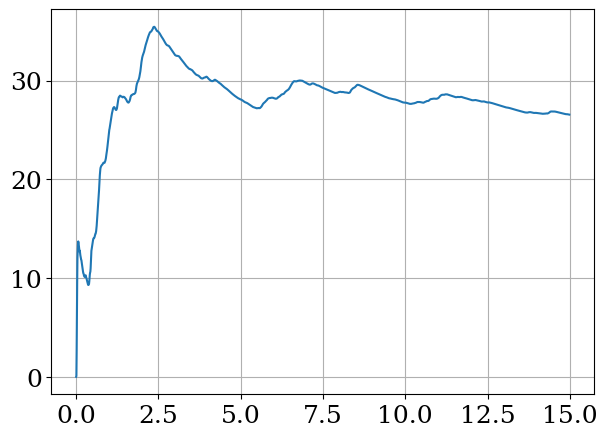

In [998]:
firstMoment = timeAverage(Ekin+Epot)
secondMoment = timeAverage((Ekin+Epot)**2)

variance = secondMoment - firstMoment**2

plt.plot(time, np.sqrt(variance))

In [999]:
np.mean(Epot+Ekin), np.var(Epot+Ekin), np.std(Epot+Ekin)

(-443.55505549626463, 705.3615718304312, 26.55864401339856)

In [1000]:
np.sqrt(variance[-1]), timeAverage(Epot+Ekin)[-1]

(26.558644013401928, -443.5550554962648)

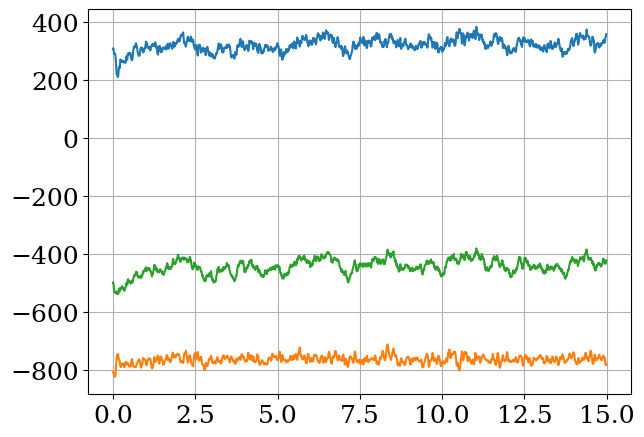

In [1001]:
plt.plot(time, Ekin)
plt.plot(time, Epot)
plt.plot(time, Ekin + Epot)

## Time step size
The time steps are $10^{-3}\Delta t_0$  

In [1017]:
#Importing all the data
start = 249
datak0 = np.loadtxt("k0.csv", dtype=float, delimiter=",")
Ek0 = datak0[start:,-2] + datak0[start:,-3]
timek0 = datak0[start:,-1]
deltaEk0 = Ek0 - timeAverage(Ek0)# Ek0[0]

datak1 = np.loadtxt("k1.csv", dtype=float, delimiter=",")
Ek1 = datak1[start:,-2] + datak1[start:,-3]
timek1 = datak1[start:,-1]
deltaEk1 = Ek1 - timeAverage(Ek1)#Ek1[0]

datak2 = np.loadtxt("k2.csv", dtype=float, delimiter=",")
Ek2 = datak2[start:,-2] + datak2[start:,-3]
timek2 = datak2[start:,-1]
deltaEk2 = Ek2 - timeAverage(Ek2)#Ek2[0]

datak3 = np.loadtxt("k3.csv", dtype=float, delimiter=",")
Ek3 = datak3[start:,-2] + datak3[start:,-3]
timek3 = datak3[start:,-1]
deltaEk3 = Ek3 - timeAverage(Ek3)#Ek3[0]

datak4 = np.loadtxt("k4.csv", dtype=float, delimiter=",")
Ek4 = datak4[start:,-2] + datak4[start:,-3]
timek4 = datak4[start:,-1]
deltaEk4 = Ek4 - timeAverage(Ek4)#Ek4[0]

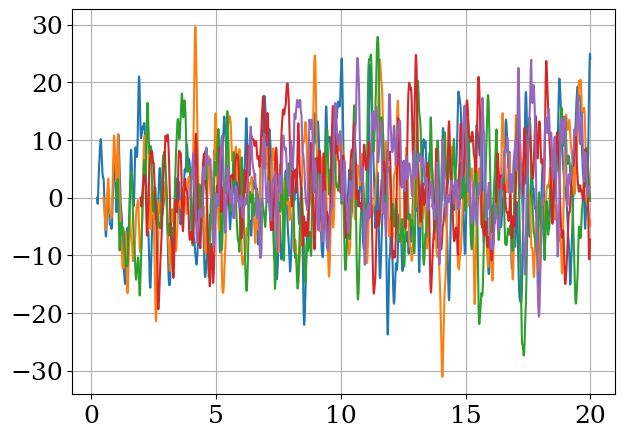

In [1018]:
deltat = 1e-3
p = 0

plt.plot(timek0, deltaEk0/(deltat)**p)
plt.plot(timek1, deltaEk1/(deltat*2**1)**p)
plt.plot(timek2, deltaEk2/(deltat*2**2)**p)
plt.plot(timek3, deltaEk3/(deltat*2**3)**p)
plt.plot(timek4, deltaEk4/(deltat*2**4)**p)

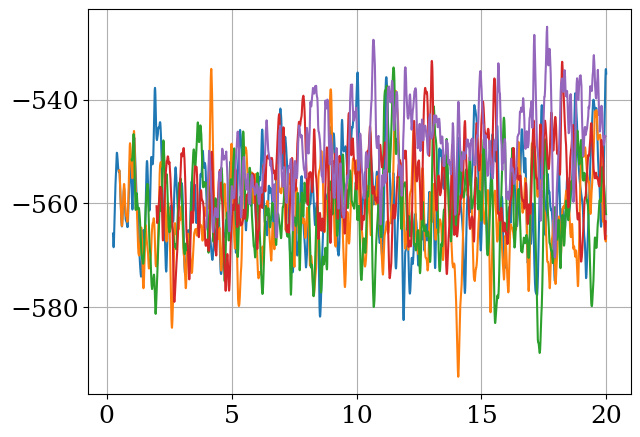

In [1019]:
plt.plot(timek0, Ek0)
plt.plot(timek1, Ek1)
plt.plot(timek2, Ek2)
plt.plot(timek3, Ek3)
plt.plot(timek4, Ek4)

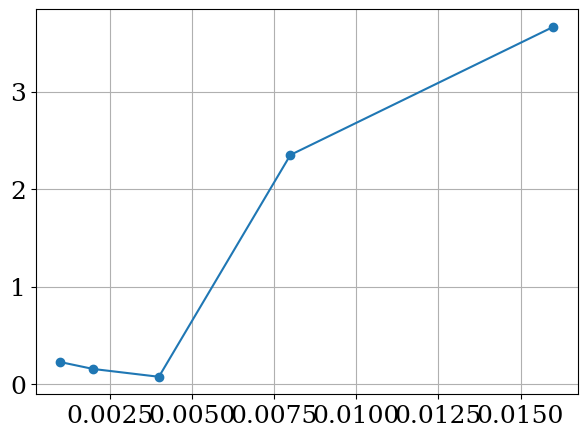

In [1025]:
deltat_arr = np.array([deltat* 2**0, deltat* 2**1, deltat* 2**2, deltat* 2**3, deltat* 2**4])

new_fluc = np.array([(deltaEk0-timeAverage(deltaEk0))[-1]/(deltat*2**0)**p, (deltaEk1-timeAverage(deltaEk1))[-1]/(deltat*2**1)**p, (deltaEk2-timeAverage(deltaEk2))[-1]/(deltat*2**2)**p, (deltaEk3-timeAverage(deltaEk3))[-1]/(deltat*2**3)**p, (deltaEk4-timeAverage(deltaEk4))[-1]/(deltat*2**4)**p])


E_fluc = np.array([np.mean(deltaEk0), np.mean(deltaEk1), np.mean(deltaEk2), np.mean(deltaEk3), np.mean(deltaEk4)])

plt.plot(deltat_arr, E_fluc/deltat_arr**0, '-o')


## Conserved Quantities

In [1006]:
#Energy
E_start = 200

Etot = Etot[E_start:]

deltaEtot = Etot - Etot[0]

Eroot = np.sqrt(np.mean(deltaEtot**2)/np.mean(Etot**2))
Eroot

0.05720586621076098

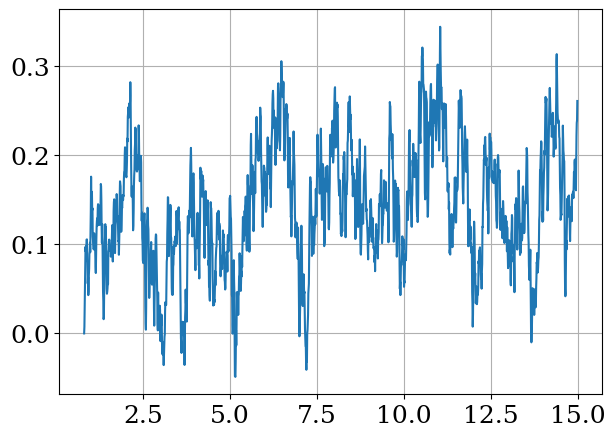

In [1007]:
#Momentum
p_start = 100
px = mom[p_start:,:3*N:3]
py = mom[p_start:,1:3*N:3]
pz = mom[p_start:,2:3*N:3]


delta_px = px #- px[0,:]
delta_py = py #- py[0,:]
delta_pz = pz #- pz[0,:]


p_squared = delta_px**2 + delta_py**2 + delta_pz**2
p_squared_avg = np.mean(p_squared, axis = 1)


plt.plot(time[p_start:], np.sqrt(p_squared_avg) - np.sqrt(p_squared_avg[0]))

In [1008]:
timeAverage((np.sqrt(p_squared_avg) - np.sqrt(p_squared_avg[0]))/np.sqrt(p_squared_avg) )[-1]

0.06223278325064574

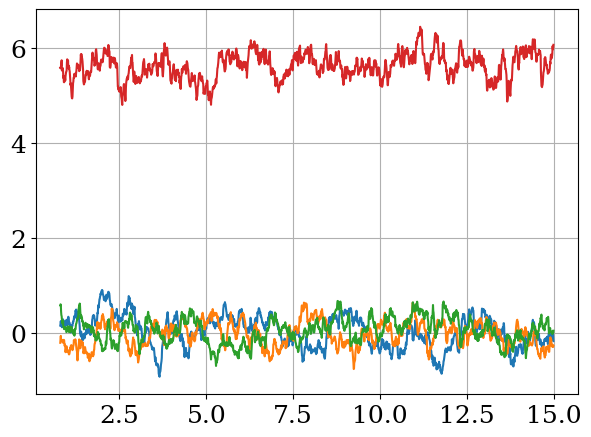

In [1009]:
#Angular momentum
r_start = p_start

x = pos[r_start:,:3*N:3]
y = pos[r_start:,1:3*N:3]
z = pos[r_start:,2:3*N:3]

Lx = y*pz - py*z
Ly = z*px - pz*x
Lz = x*py - px*y

L2 = Lx**2 + Ly**2 + Lz**2

L2_mean = np.mean(L2,axis = 1)

plt.plot(time[r_start:], np.mean(Lx,axis = 1))
plt.plot(time[r_start:], np.mean(Ly,axis = 1))
plt.plot(time[r_start:], np.mean(Lz,axis = 1))
plt.plot(time[r_start:], np.sqrt(L2_mean))


## Pressure

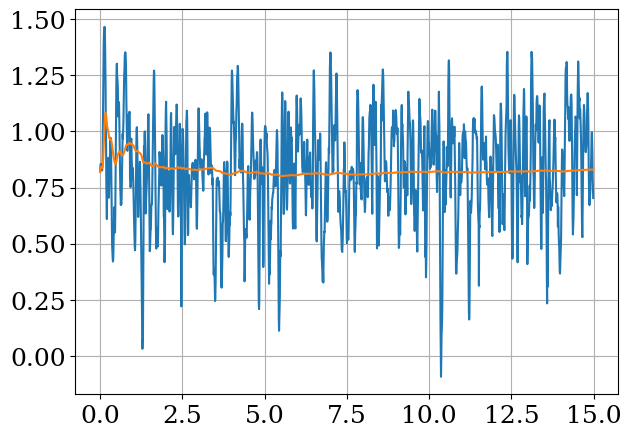

In [1010]:
P = density*kT + 1/(3*(9.22**3))*virial

P_avg = timeAverage(P)


plt.plot(time, P)
plt.plot(time, P_avg)

In [1011]:
P_avg[-1]

0.8299555263569514

## Potential energy

In [1012]:
def LJ_potential(distance):
    return 4*(distance**(-12) - distance**(-6))

def calculate_distance(x, y, z, box_length):

    # Create arrays for pairwise differences
    dx = np.subtract.outer(x, x)
    dy = np.subtract.outer(y, y)
    dz = np.subtract.outer(z, z)

    # Apply periodic boundary conditions
    dx = (dx + box_length / 2) % box_length - box_length / 2
    dy = (dy + box_length / 2) % box_length - box_length / 2
    dz = (dz + box_length / 2) % box_length - box_length / 2

    # Calculate distances
    distances = np.sqrt(dx**2 + dy**2 + dz**2)

    # Set diagonal elements to a large value so the self energy is 0
    np.fill_diagonal(distances, np.inf)


    return distances



distances = calculate_distance(x[-1,:], y[-1,:], z[-1,:], L)
potentials = LJ_potential(distances)

per_potentials = np.sum(potentials, axis = 0)
avg_potentials = np.mean(per_potentials)
std_potentials = np.std(per_potentials)

print(avg_potentials, std_potentials)

-7.171814343945936 0.938226337382267


## Chemical potential

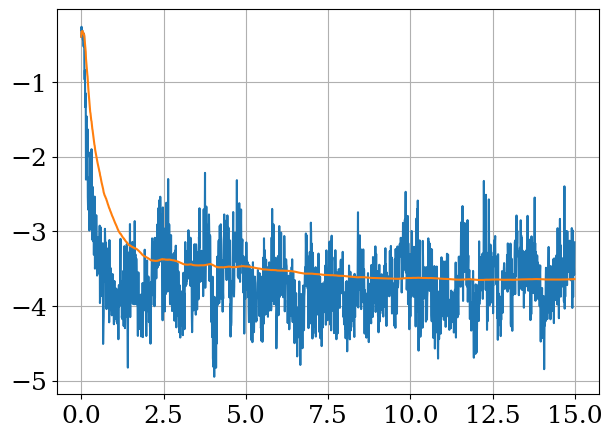

In [1013]:
mu = -kT*np.log(avg_expo)

plt.plot(time, mu)
plt.plot(time, timeAverage(mu))

#plt.ylim(top=20)

In [1014]:
np.mean(-kT*np.log(avg_expo)), np.std(-kT*np.log(avg_expo))

(-3.6404776921536475, 0.5278244431252137)

In [1015]:
mu_std = np.sqrt(timeAverage(mu**2) - timeAverage(mu)**2 )

mu_std[-1]

0.5278244431252566

(-3.891316066235598, 5.0)

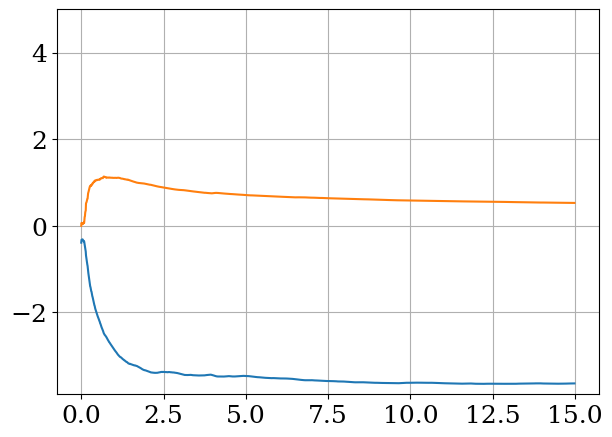

In [1016]:
plt.plot(time, timeAverage(mu))
plt.plot(time,mu_std)
plt.ylim(top = 5)